#IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

#Reading data

In [ ]:
base_credit = pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#EXPLORATORY DATA ANALYSIS

##univariate analysis of continuous variables

In [ ]:
measures_df = base_credit.select_dtypes(include='number')

In [ ]:
measures_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [ ]:
measures_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
columns = list(measures_df.columns)
columns.remove('loan_status')
columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

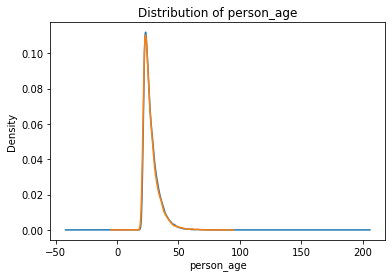

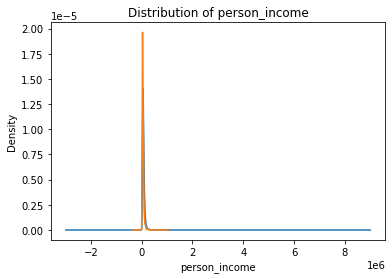

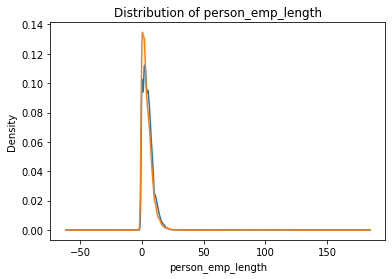

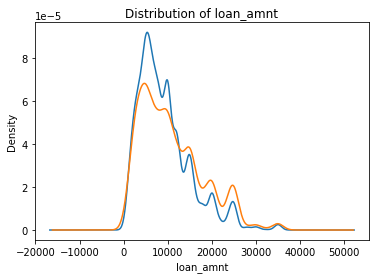

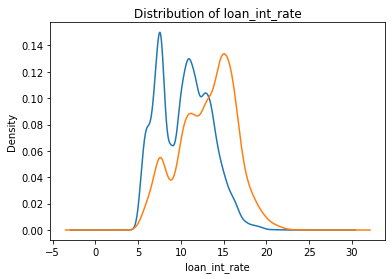

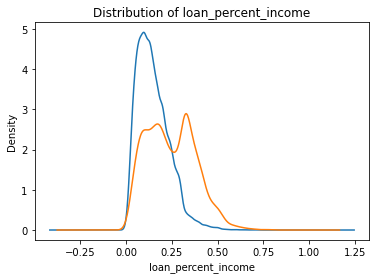

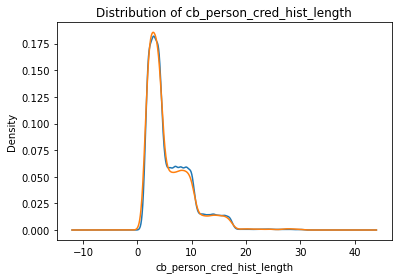

In [ ]:
grp = base_credit.groupby('loan_status')
for col in columns:
    plt.figure()
    #plt.hist(base_credit[col], density = True)
    grp[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

##bivariate analysis on numerical features

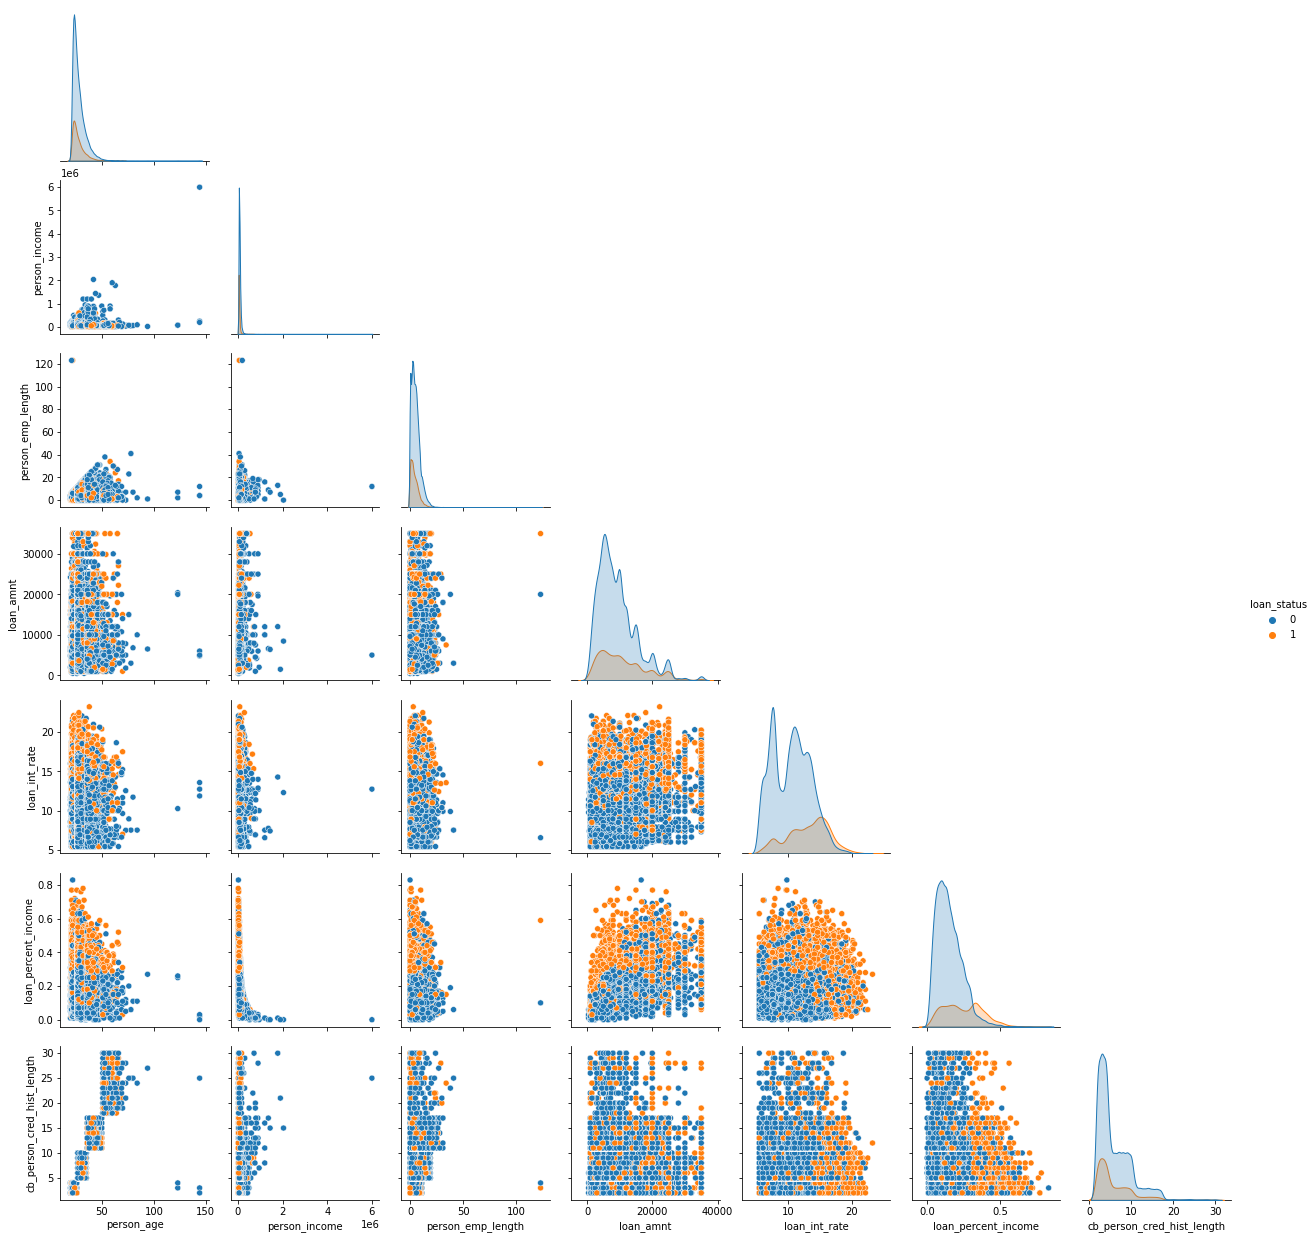

In [ ]:
sns.pairplot(measures_df, hue = 'loan_status', corner = True)

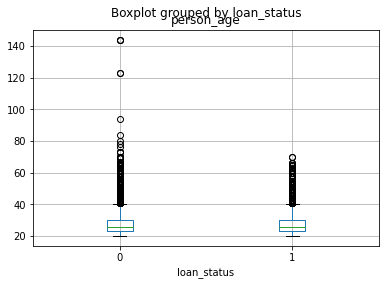

In [ ]:
measures_df.boxplot(column = 'person_age', by='loan_status')

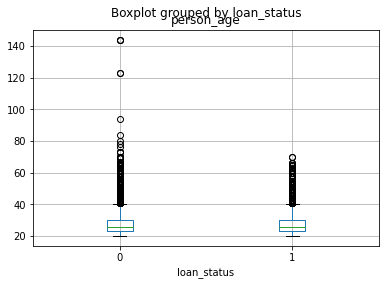

In [ ]:
measures_df.boxplot(column=['person_age'],by='loan_status')

In [ ]:
measures_df.isin(['?']).any()

person_age                    False
person_income                 False
person_emp_length             False
loan_amnt                     False
loan_int_rate                 False
loan_status                   False
loan_percent_income           False
cb_person_cred_hist_length    False
dtype: bool

In [ ]:
base_credit.select_dtypes(exclude='number').isin(['?']).any()

person_home_ownership        False
loan_intent                  False
loan_grade                   False
cb_person_default_on_file    False
dtype: bool

In [ ]:
base_credit['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [ ]:
base_credit['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [ ]:
base_credit['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [ ]:
base_credit['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

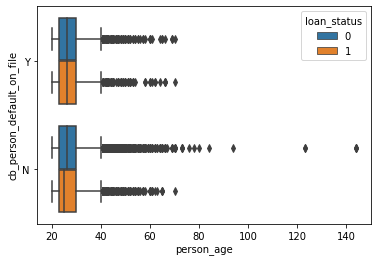

In [ ]:
sns.boxplot(data=base_credit, x="person_age", y="cb_person_default_on_file", hue="loan_status")

#PREPROCESSING

##dropping null valued rows

In [ ]:
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
base_credit = base_credit.dropna()

In [ ]:
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##outliers

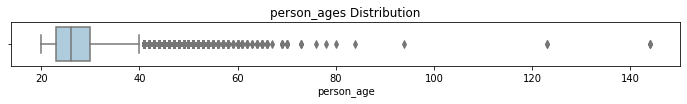

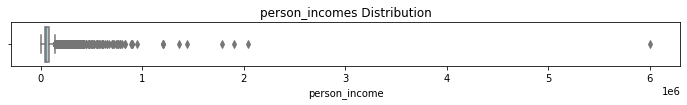

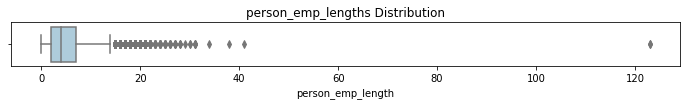

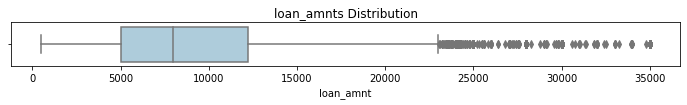

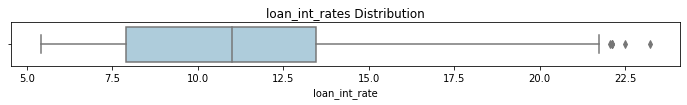

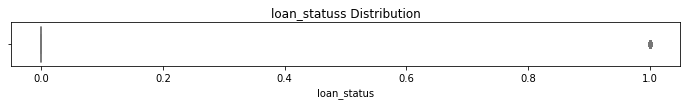

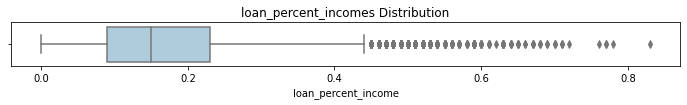

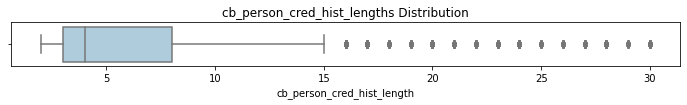

In [ ]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [ ]:
for i in measures_df.columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  person_age
558
# of rows beyond range of 3 standard deviations in  person_income
233
# of rows beyond range of 3 standard deviations in  person_emp_length
321
# of rows beyond range of 3 standard deviations in  loan_amnt
337
# of rows beyond range of 3 standard deviations in  loan_int_rate
38
# of rows beyond range of 3 standard deviations in  loan_status
0
# of rows beyond range of 3 standard deviations in  loan_percent_income
336
# of rows beyond range of 3 standard deviations in  cb_person_cred_hist_length
284


##eliminating outliers

In [ ]:
base_credit.shape

(28638, 12)

In [ ]:
for col in columns:
  base_credit = base_credit[(base_credit[col] <= base_credit[col].mean() + 3*base_credit[col].std()) &
        (base_credit[col] >= base_credit[col].mean() - 3*base_credit[col].std())]

In [ ]:
base_credit.shape

(26620, 12)

##encoding

In [ ]:
base_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
base_credit['cb_person_default_on_file'] = base_credit['cb_person_default_on_file'].astype('category')
base_credit['loan_grade'] = base_credit['loan_grade'].astype('category')
base_credit['loan_intent'] = base_credit['loan_intent'].astype('category')
base_credit['person_home_ownership'] = base_credit['person_home_ownership'].astype('category')

In [ ]:
base_credit['cb_person_default_on_file_new'] = base_credit['cb_person_default_on_file'].cat.codes
base_credit['loan_grade_new'] = base_credit['loan_grade'].cat.codes
base_credit['loan_intent_new'] = base_credit['loan_intent'].cat.codes
base_credit['person_home_ownership_new'] = base_credit['person_home_ownership'].cat.codes

In [ ]:
base_credit['loan_intent_new'].head()

1     1
5     5
9     5
11    2
19    1
Name: loan_intent_new, dtype: int8

In [ ]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(base_credit[['cb_person_default_on_file_new','loan_grade_new', 'loan_intent_new', 'person_home_ownership_new']]).toarray(), index=np.array(base_credit.index))

In [ ]:
np.array(base_credit.index)

array([    1,     5,     9, ..., 32293, 32295, 32296])

In [ ]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
New_df=base_credit.join(enc_data)

In [ ]:
New_df.columns

Index([                   'person_age',                 'person_income',
               'person_home_ownership',             'person_emp_length',
                         'loan_intent',                    'loan_grade',
                           'loan_amnt',                 'loan_int_rate',
                         'loan_status',           'loan_percent_income',
           'cb_person_default_on_file',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,            

In [ ]:
New_df = New_df.drop(columns=['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership'])

In [ ]:
New_df.columns

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',                   'loan_status',
                 'loan_percent_income',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,            

In [ ]:
New_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_new,loan_grade_new,...,9,10,11,12,13,14,15,16,17,18
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,21,10000,2.0,4500,8.63,1,0.45,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,24,10800,8.0,1750,10.99,1,0.16,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##stripping target values

In [ ]:
features = New_df.drop('loan_status', 1)
target = New_df['loan_status']

In [ ]:
features.shape

(26620, 30)

In [ ]:
target.head()

1     0
5     1
9     1
11    1
19    1
Name: loan_status, dtype: int64

In [ ]:
del New_df

##train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

##standarising data

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##feature extraction

In [ ]:
Estimator = RandomForestClassifier(n_estimators=10) 
#using random forest as the estimator for recursive feature extractor
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=20)
fitter = FeatureExtractor.fit(x_train, y_train)
extracted_features = features.columns[(fitter.get_support())]

In [ ]:
extracted_features

Index([                'person_age',              'person_income',
                'person_emp_length',                  'loan_amnt',
                    'loan_int_rate',        'loan_percent_income',
       'cb_person_cred_hist_length',             'loan_grade_new',
                  'loan_intent_new',  'person_home_ownership_new',
                                  0,                            4,
                                  5,                            9,
                                 10,                           11,
                                 12,                           15,
                                 17,                           18],
      dtype='object')

In [ ]:
fitter.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True])

In [ ]:
featureSelectedTrain = [row[fitter.get_support()] for row in x_train]
featureSelectedTest = [row[fitter.get_support()] for row in x_test]

##class imbalance

In [ ]:
base_credit['loan_status'].value_counts()

0    21039
1     5581
Name: loan_status, dtype: int64

##upsampling

In [ ]:
upsampler = SMOTE(random_state = 5)
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))

Before OverSampling, the shape of train_X: (21296, 30)
Before OverSampling, the shape of train_y: (21296,) 

After OverSampling, the shape of train_X: (33616, 30)
After OverSampling, the shape of train_y: (33616,) 

Counts of label '0' - Before Oversampling:16808, After OverSampling: 16808
Counts of label '1' - Before Oversampling:4488, After OverSampling: 16808


##downsampling

In [ ]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (17412, 30)
After UnderSampling, the shape of train_y: (17412,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 12924
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


In [ ]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train_dres, y_train_dres)


In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (14791, 30)
After UnderSampling, the shape of train_y: (14791,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 10303
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


##PCA

##no resampling

In [ ]:
PCanalysis = PCA()
x_train_pca = PCanalysis.fit_transform(x_train)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16462406 0.26836134 0.34306381 0.41053816 0.47319864 0.52278867
 0.56543052 0.60662328 0.64751193 0.68777819 0.72613252 0.76313788
 0.79892112 0.83280874 0.86645296 0.90002942 0.93300633 0.96153991
 0.98969758 0.99483158 0.99769644 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
PCanalysis = PCA(19)
X_train_pca = PCanalysis.fit_transform(x_train)
X_test_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
X_train_pca.shape

(21296, 19)

##upsample

In [ ]:
PCanalysis = PCA()
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.1706396  0.26371615 0.33450783 0.39935435 0.46100678 0.51648312
 0.56924496 0.62118415 0.67060957 0.71142982 0.7496501  0.78569248
 0.8198325  0.85378202 0.88736081 0.91718335 0.94534705 0.96960525
 0.99153178 0.99554267 0.99814182 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.1706396  0.26371615 0.33450783 0.39935435 0.46100678 0.51648312
 0.56924496 0.62118415 0.67060957 0.71142982 0.7496501  0.78569248
 0.8198325  0.85378202 0.88736081 0.91718335 0.94534705 0.96960525
 0.99153178]


In [ ]:
PCanalysis = PCA(18)
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
X_train_upsampled_pca.shape

(33616, 18)

In [ ]:
X_train_upsampled_pca[:,0].shape

(33616,)

[Text(0.5, 1.0, ' data PCA projection')]

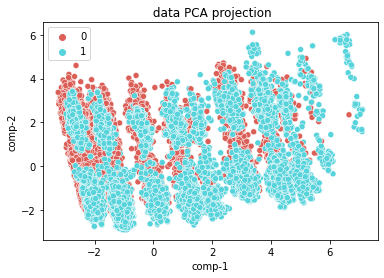

In [ ]:
df1 = pd.DataFrame()
df1["y"] = y_train_ures_SMOTE
df1["comp-1"] = X_train_upsampled_pca[:,0]
df1["comp-2"] = X_train_upsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title=" data PCA projection") 

##downsample

In [ ]:
PCanalysis = PCA()
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597 0.9942807  0.99761155 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597]


In [ ]:
PCanalysis = PCA(n_components=18)
x_train_downsampled_pca = PCanalysis.fit_transform(x_train_dres)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [ ]:
x_train_downsampled_pca.shape

(14791, 18)

[Text(0.5, 1.0, ' data PCA projection')]

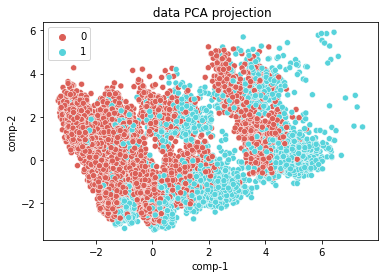

In [ ]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downsampled_pca[:,0]
df["comp-2"] = x_train_downsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" data PCA projection") 

#Models

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
def scores(y_test, y_prediction):
  print('Analysis of the Algorithm:\n')
  print(confusion_matrix(y_test, y_prediction))
  print(confusion_matrix(y_test, y_prediction))
  print(classification_report(y_test, y_prediction))
  print('Accuracy:',accuracy_score(y_test, y_prediction))
  print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
  print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
  print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

In [ ]:
def roc(y_test, y_prediction):
  falsePositiveRate = dict()
  truePositiveRate = dict()
  threshold = dict()

  for i in range(6):    
      falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

  plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
  plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

  plt.title('Multiclass ROC curve for LR')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC curve for LR ',dpi=300)

In [ ]:
# summarize results
def results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
resultDic={}

#LR Model with GridsearchCV

In [ ]:
def LR(x_train, y_train):
  model = LogisticRegression()
  solver=['saga']
  penalty = ['l2', 'l1']
  c_values = [100, 10, 1.0, 0.1, 0.01]
  
  # define grid search
  grid = dict(solver=solver,penalty=penalty,C=c_values)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(recall_score, average='weighted'), error_score=0)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [ ]:
LRresult={}

##Logistic Regression without resampling

In [ ]:
grid_result = LR(x_train, y_train)

In [ ]:
results(grid_result)

Best: 0.868426 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867957 (0.001690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002488) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR1'])

Analysis of the Algorithm:

[[4015  216]
 [ 495  598]]
[[4015  216]
 [ 495  598]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8664537941397445
Precision: 0.8582996906809005
Recall: 0.8664537941397445
F1 Score: 0.8588159828706913
testing recall Score for class1: 0.5471180237877402


In [ ]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5479055258467023


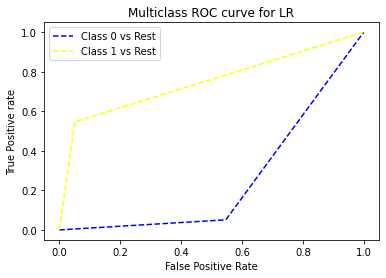

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression without resampling and pca

In [ ]:
grid_result = LR(x_train_pca, y_train)

In [ ]:
results(grid_result)

Best: 0.868426 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001521) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001758) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.865562 (0.001774) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", LRresult['LR2'])

Analysis of Logistic Regression Algorithm:

[[3707  524]
 [ 789  304]]
[[3707  524]
 [ 789  304]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4231
           1       0.37      0.28      0.32      1093

    accuracy                           0.75      5324
   macro avg       0.60      0.58      0.58      5324
weighted avg       0.73      0.75      0.74      5324

Accuracy: 0.7533809166040571
Precision: 0.7306159573269803
Recall: 0.7533809166040571
F1 Score: 0.7401148503638109
Class 1 recall score on test data: 0.27813357731015553


In [ ]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5452317290552585


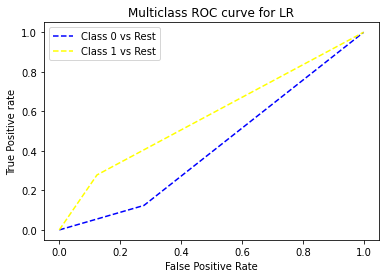

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling

In [ ]:
grid_result = LR(x_train_dres, y_train_dres)

In [ ]:
results(grid_result)

Best: 0.887016 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.886845 (0.006242) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.886845 (0.006242) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.886845 (0.006242) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.886845 (0.006242) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.886845 (0.006242) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.887016 (0.006415) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.886760 (0.006557) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.887016 (0.006120) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.886760 (0.006529) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.884206 (0.005544) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',LRresult['LR3'])

Analysis of Logistic Regression Algorithm:

[[3137 1094]
 [ 212  881]]
[[3137 1094]
 [ 212  881]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      4231
           1       0.45      0.81      0.57      1093

    accuracy                           0.75      5324
   macro avg       0.69      0.77      0.70      5324
weighted avg       0.84      0.75      0.78      5324

Accuracy: 0.7546957175056349
Precision: 0.8359744978873005
Recall: 0.7546957175056349
F1 Score: 0.775684548457577
testing recall Score: 0.8060384263494969


In [ ]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.8221925133689839


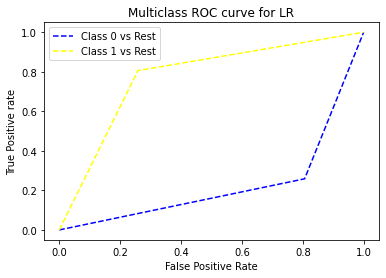

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling and pca

In [ ]:
grid_result = LR(x_train_downsampled_pca, y_train_dres)

In [ ]:
results(grid_result)

Best: 0.888463 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.887782 (0.006609) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.887782 (0.006609) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.887697 (0.006603) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.887697 (0.006603) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.887782 (0.006680) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.887867 (0.006499) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.888463 (0.006411) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.888378 (0.006657) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.886335 (0.007715) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.883184 (0.007732) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',LRresult['LR4'])

Analysis of Logistic Regression Algorithm:

[[3109 1122]
 [ 206  887]]
[[3109 1122]
 [ 206  887]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      4231
           1       0.44      0.81      0.57      1093

    accuracy                           0.75      5324
   macro avg       0.69      0.77      0.70      5324
weighted avg       0.84      0.75      0.77      5324

Accuracy: 0.7505634861006761
Precision: 0.8359601891595138
Recall: 0.7505634861006761
F1 Score: 0.7722525576861199
testing class 1 recall Score: 0.8115279048490394


In [ ]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.8268716577540107


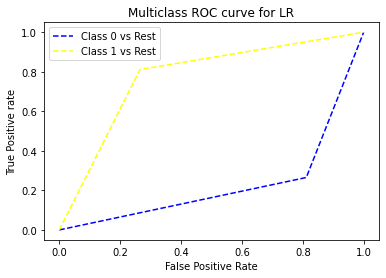

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling

In [ ]:
grid_result = LR(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [ ]:
results(grid_result)

Best: 0.803546 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802505 (0.002507) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.802505 (0.002507) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802534 (0.002475) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.802505 (0.002507) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.802534 (0.002503) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.802415 (0.002411) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.802743 (0.002429) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.803546 (0.002678) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802743 (0.002026) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR5'])

Analysis of Logistic Regression Algorithm:

[[3441  790]
 [ 256  837]]
[[3441  790]
 [ 256  837]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4231
           1       0.51      0.77      0.62      1093

    accuracy                           0.80      5324
   macro avg       0.72      0.79      0.74      5324
weighted avg       0.85      0.80      0.82      5324

Accuracy: 0.8035311795642374
Precision: 0.845287382224053
Recall: 0.8035311795642374
F1 Score: 0.8162002085314433
Class 1 recall score for test data: 0.7657822506861848


In [ ]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7851618277010948


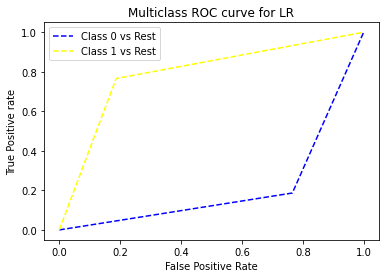

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling and pca

In [ ]:
grid_result = LR(X_train_upsampled_pca, y_train_ures_SMOTE)

In [ ]:
results(grid_result)

Best: 0.788732 using {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.787839 (0.004077) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004076) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.787928 (0.004138) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.787839 (0.004132) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.787988 (0.004184) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.788018 (0.003949) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.788732 (0.004333) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR6'])

Analysis of Logistic Regression Algorithm:

[[3363  868]
 [ 253  840]]
[[3363  868]
 [ 253  840]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4231
           1       0.49      0.77      0.60      1093

    accuracy                           0.79      5324
   macro avg       0.71      0.78      0.73      5324
weighted avg       0.84      0.79      0.80      5324

Accuracy: 0.7894440270473329
Precision: 0.840066001671411
Recall: 0.7894440270473329
F1 Score: 0.8043082828519552
Class 1 recall score for test data: 0.7685269899359561


In [ ]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7795097572584484


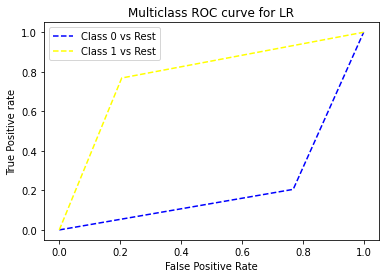

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression with select features

In [ ]:
grid_result = LR(featureSelectedTrain, y_train)

In [ ]:
results(grid_result)

Best: 0.868473 using {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868332 (0.001533) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868191 (0.001930) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868097 (0.001671) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868238 (0.001362) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.865796 (0.002159) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002111) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
LRresult['LR7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR7'])

Analysis of the Algorithm:

[[4016  215]
 [ 500  593]]
[[4016  215]
 [ 500  593]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.54      0.62      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8657024793388429
Precision: 0.8573852511167052
Recall: 0.8657024793388429
F1 Score: 0.8578233448999882
testing recall Score for class1: 0.5425434583714547


In [ ]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5499108734402852


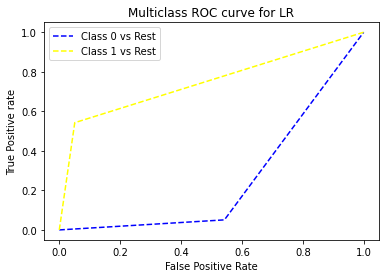

In [ ]:
roc(y_test, y_prediction)

##Logistic Regression comparision

In [ ]:
LRresult

{'LR1': 0.5471180237877402,
 'LR2': 0.27813357731015553,
 'LR3': 0.8060384263494969,
 'LR4': 0.8115279048490394,
 'LR5': 0.7657822506861848,
 'LR6': 0.7685269899359561,
 'LR7': 0.5425434583714547}

Logistic Regression with neighborhood cleaning rule undersampling and PCA gave better Recall score for Class 1 

In [ ]:
resultDic['LogisticRegression']=0.8115279048490394#LR4 {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

#Decision Tree with gridsearchCV

In [ ]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="gini")
  max_depth = [3, 4, 5, 6, 7, 8, 9]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [ ]:
DTresult={}

##Decision Tree without resampling

In [ ]:
grid_result = DT(x_train, y_train)

In [ ]:
results(grid_result)

Best: 0.928437 using {'max_depth': 8, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 20}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 4}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 10}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 20}
0.921863 (0.005066) with: {'max_depth': 5, 'min_samples_split': 4}
0.921863 (0.005066) with: {'max_depth': 5, 'min_samples_split': 10}
0.921863 (0.005066) with: {'max_depth': 5, 'min_samples_split': 20}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 4}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 10}
0.925807 (0.006188) with: {'max_depth': 6, 'min_samples_split': 20}
0.926512 (0.005754) with: {'max_depth': 7, 'min_samples_split': 4}
0.926559 (0.005947) with: {'max_depth': 7, 'min_samples_spl

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT1'])

Analysis of Logistic Regression Algorithm:

[[4213   18]
 [ 327  766]]
[[4213   18]
 [ 327  766]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.98      0.70      0.82      1093

    accuracy                           0.94      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.94      0.93      5324

Accuracy: 0.9351990984222389
Precision: 0.9380469157862095
Recall: 0.9351990984222389
F1 Score: 0.9310066529048477
testing recall Score for class1: 0.7008234217749314


In [ ]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.696969696969697


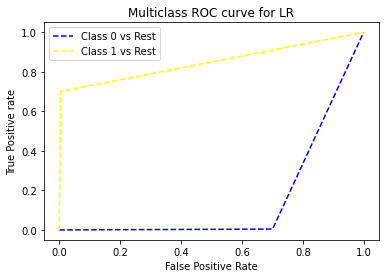

In [ ]:
roc(y_test, y_prediction)

In [ ]:
fig = plt.figure(figsize=(25,20))
from sklearn.tree import plot_tree
fig = plot_tree(grid_result.best_estimator_, feature_names=features.keys())

##Decision Tree without resampling and pca

In [ ]:
grid_result = DT(x_train_pca, y_train)

In [ ]:
results(grid_result)

Best: 0.892749 using {'max_depth': 8, 'min_samples_split': 4}
0.845980 (0.005368) with: {'max_depth': 3, 'min_samples_split': 4}
0.845980 (0.005368) with: {'max_depth': 3, 'min_samples_split': 10}
0.845980 (0.005368) with: {'max_depth': 3, 'min_samples_split': 20}
0.868895 (0.005729) with: {'max_depth': 4, 'min_samples_split': 4}
0.868895 (0.005729) with: {'max_depth': 4, 'min_samples_split': 10}
0.868895 (0.005729) with: {'max_depth': 4, 'min_samples_split': 20}
0.875939 (0.005179) with: {'max_depth': 5, 'min_samples_split': 4}
0.875986 (0.005240) with: {'max_depth': 5, 'min_samples_split': 10}
0.875939 (0.005306) with: {'max_depth': 5, 'min_samples_split': 20}
0.885800 (0.006143) with: {'max_depth': 6, 'min_samples_split': 4}
0.885659 (0.005817) with: {'max_depth': 6, 'min_samples_split': 10}
0.885706 (0.005979) with: {'max_depth': 6, 'min_samples_split': 20}
0.890167 (0.004415) with: {'max_depth': 7, 'min_samples_split': 4}
0.890590 (0.005249) with: {'max_depth': 7, 'min_samples_spl

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", DTresult['DT2'])

Analysis of Logistic Regression Algorithm:

[[3408  823]
 [ 757  336]]
[[3408  823]
 [ 757  336]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4231
           1       0.29      0.31      0.30      1093

    accuracy                           0.70      5324
   macro avg       0.55      0.56      0.56      5324
weighted avg       0.71      0.70      0.71      5324

Accuracy: 0.7032306536438768
Precision: 0.7097803504412846
Recall: 0.7032306536438768
F1 Score: 0.7064129701466392
Class 1 recall score on test data: 0.3074107959743824


In [ ]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.6477272727272727


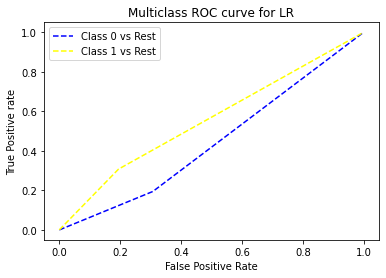

In [ ]:
roc(y_test, y_prediction)

##Decision Tree with undersampling

In [ ]:
grid_result = DT(x_train_dres, y_train_dres)

In [ ]:
results(grid_result)

Best: 0.915539 using {'max_depth': 9, 'min_samples_split': 20}
0.871520 (0.008208) with: {'max_depth': 3, 'min_samples_split': 4}
0.871520 (0.008208) with: {'max_depth': 3, 'min_samples_split': 10}
0.871520 (0.008208) with: {'max_depth': 3, 'min_samples_split': 20}
0.899106 (0.006098) with: {'max_depth': 4, 'min_samples_split': 4}
0.898936 (0.006225) with: {'max_depth': 4, 'min_samples_split': 10}
0.899106 (0.006098) with: {'max_depth': 4, 'min_samples_split': 20}
0.901916 (0.005866) with: {'max_depth': 5, 'min_samples_split': 4}
0.902001 (0.005846) with: {'max_depth': 5, 'min_samples_split': 10}
0.902001 (0.005846) with: {'max_depth': 5, 'min_samples_split': 20}
0.907450 (0.005308) with: {'max_depth': 6, 'min_samples_split': 4}
0.907280 (0.005434) with: {'max_depth': 6, 'min_samples_split': 10}
0.906854 (0.005272) with: {'max_depth': 6, 'min_samples_split': 20}
0.909749 (0.007364) with: {'max_depth': 7, 'min_samples_split': 4}
0.909834 (0.007207) with: {'max_depth': 7, 'min_samples_sp

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',DTresult['DT3'])

Analysis of Logistic Regression Algorithm:

[[3222 1009]
 [ 160  933]]
[[3222 1009]
 [ 160  933]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      4231
           1       0.48      0.85      0.61      1093

    accuracy                           0.78      5324
   macro avg       0.72      0.81      0.73      5324
weighted avg       0.86      0.78      0.80      5324

Accuracy: 0.7804282494365139
Precision: 0.8557376385883342
Recall: 0.7804282494365139
F1 Score: 0.7988960604684457
testing recall Score: 0.8536139066788655


In [ ]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.8803475935828877


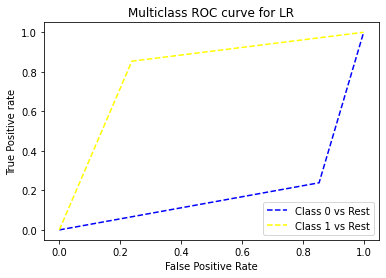

In [ ]:
roc(y_test, y_prediction)

##Decision Tree with undersampling and pca

In [ ]:
grid_result = DT(x_train_downsampled_pca, y_train_dres)

In [ ]:
results(grid_result)

Best: 0.898680 using {'max_depth': 9, 'min_samples_split': 4}
0.854321 (0.005889) with: {'max_depth': 3, 'min_samples_split': 4}
0.854321 (0.005889) with: {'max_depth': 3, 'min_samples_split': 10}
0.854236 (0.005964) with: {'max_depth': 3, 'min_samples_split': 20}
0.863176 (0.006978) with: {'max_depth': 4, 'min_samples_split': 4}
0.863176 (0.006978) with: {'max_depth': 4, 'min_samples_split': 10}
0.863176 (0.006978) with: {'max_depth': 4, 'min_samples_split': 20}
0.877395 (0.004950) with: {'max_depth': 5, 'min_samples_split': 4}
0.877480 (0.005018) with: {'max_depth': 5, 'min_samples_split': 10}
0.877650 (0.005169) with: {'max_depth': 5, 'min_samples_split': 20}
0.885994 (0.002803) with: {'max_depth': 6, 'min_samples_split': 4}
0.885483 (0.003287) with: {'max_depth': 6, 'min_samples_split': 10}
0.885057 (0.001615) with: {'max_depth': 6, 'min_samples_split': 20}
0.893657 (0.004690) with: {'max_depth': 7, 'min_samples_split': 4}
0.893061 (0.004628) with: {'max_depth': 7, 'min_samples_spl

In [ ]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',DTresult['DT4'])

Analysis of the Algorithm:

[[2985 1246]
 [ 189  904]]
[[2985 1246]
 [ 189  904]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      4231
           1       0.42      0.83      0.56      1093

    accuracy                           0.73      5324
   macro avg       0.68      0.77      0.68      5324
weighted avg       0.83      0.73      0.76      5324

Accuracy: 0.730465815176559
Precision: 0.8337017126985016
Recall: 0.730465815176559
F1 Score: 0.7551539858031923
testing class 1 recall Score: 0.8270814272644099


In [ ]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.8997326203208557


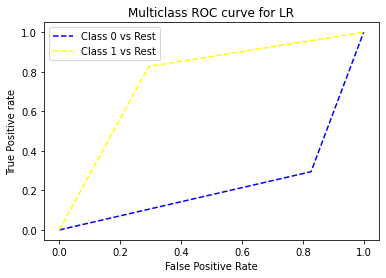

In [ ]:
roc(y_test, y_prediction)

##Decision Tree with upsampling

In [ ]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="gini")
  max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 11]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [ ]:
grid_result = DT(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [ ]:
results(grid_result)

Best: 0.872115 using {'max_depth': 11, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 10}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 20}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 4}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 10}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 20}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 4}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 10}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 20}
0.847186 (0.005614) with: {'max_depth': 6, 'min_samples_split': 4}
0.847305 (0.005504) with: {'max_depth': 6, 'min_samples_split': 10}
0.847246 (0.005481) with: {'max_depth': 6, 'min_samples_split': 20}
0.853850 (0.004036) with: {'max_depth': 7, 'min_samples_split': 4}
0.853879 (0.003994) with: {'max_depth': 7, 'min_samples_sp

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT5'])

Analysis of the Algorithm:

[[4079  152]
 [ 285  808]]
[[4079  152]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4231
           1       0.84      0.74      0.79      1093

    accuracy                           0.92      5324
   macro avg       0.89      0.85      0.87      5324
weighted avg       0.92      0.92      0.92      5324

Accuracy: 0.9179188580015026
Precision: 0.9155949484122421
Recall: 0.9179188580015026
F1 Score: 0.9158951831025295
Class 1 recall score for test data: 0.7392497712717292


In [ ]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.80140409328891


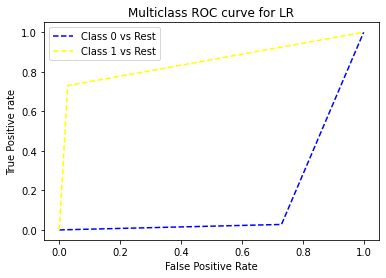

In [ ]:
roc(y_test, y_prediction)

##Decision Tree with upsampling and pca

In [ ]:
grid_result = DT(X_train_upsampled_pca, y_train_ures_SMOTE)

In [ ]:
results(grid_result)

Best: 0.840463 using {'max_depth': 11, 'min_samples_split': 4}
0.771508 (0.006603) with: {'max_depth': 3, 'min_samples_split': 4}
0.771508 (0.006603) with: {'max_depth': 3, 'min_samples_split': 10}
0.771508 (0.006603) with: {'max_depth': 3, 'min_samples_split': 20}
0.780938 (0.004849) with: {'max_depth': 4, 'min_samples_split': 4}
0.780938 (0.004849) with: {'max_depth': 4, 'min_samples_split': 10}
0.780938 (0.004849) with: {'max_depth': 4, 'min_samples_split': 20}
0.796466 (0.003478) with: {'max_depth': 5, 'min_samples_split': 4}
0.796466 (0.003478) with: {'max_depth': 5, 'min_samples_split': 10}
0.796466 (0.003478) with: {'max_depth': 5, 'min_samples_split': 20}
0.804915 (0.004298) with: {'max_depth': 6, 'min_samples_split': 4}
0.804796 (0.004256) with: {'max_depth': 6, 'min_samples_split': 10}
0.804796 (0.004291) with: {'max_depth': 6, 'min_samples_split': 20}
0.813095 (0.003358) with: {'max_depth': 7, 'min_samples_split': 4}
0.812827 (0.003210) with: {'max_depth': 7, 'min_samples_sp

In [ ]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT6'])

Analysis of the Algorithm:

[[3850  381]
 [ 336  757]]
[[3850  381]
 [ 336  757]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4231
           1       0.67      0.69      0.68      1093

    accuracy                           0.87      5324
   macro avg       0.79      0.80      0.80      5324
weighted avg       0.87      0.87      0.87      5324

Accuracy: 0.8653268219383922
Precision: 0.8674781865069275
Recall: 0.8653268219383922
F1 Score: 0.8663250198230336
Class 1 recall score for test data: 0.6925892040256175


In [ ]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8184198000951928


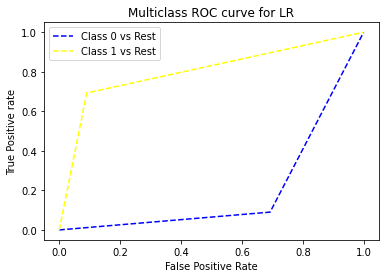

In [ ]:
roc(y_test, y_prediction)

##Decision Tree with selected Features

In [ ]:
grid_result = DT(featureSelectedTrain, y_train)

In [ ]:
results(grid_result)

Best: 0.928531 using {'max_depth': 8, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 20}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 4}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 10}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 20}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 4}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 10}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 20}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 4}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 10}
0.925807 (0.006188) with: {'max_depth': 6, 'min_samples_split': 20}
0.926512 (0.005866) with: {'max_depth': 7, 'min_samples_split': 4}
0.926606 (0.005734) with: {'max_depth': 7, 'min_samples_spl

In [ ]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
DTresult['DT7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT7'])

Analysis of the Algorithm:

[[4213   18]
 [ 328  765]]
[[4213   18]
 [ 328  765]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.98      0.70      0.82      1093

    accuracy                           0.94      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.94      0.93      5324

Accuracy: 0.9350112697220135
Precision: 0.9378784949157081
Recall: 0.9350112697220135
F1 Score: 0.930790073449885
testing recall Score for class1: 0.6999085086916743


In [ ]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.696301247771836


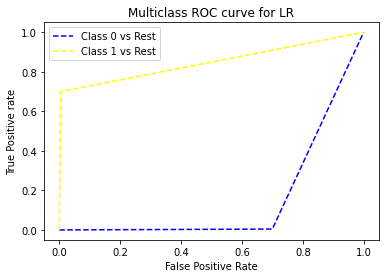

In [ ]:
roc(y_test, y_prediction)

##Decision Tree Comparision

In [ ]:
DTresult

{'DT1': 0.7008234217749314,
 'DT2': 0.3074107959743824,
 'DT3': 0.8536139066788655,
 'DT4': 0.8270814272644099,
 'DT5': 0.7392497712717292,
 'DT6': 0.6925892040256175,
 'DT7': 0.6999085086916743}

In [ ]:
resultDic['Decision Tree'] = 0.8536139066788655#DT3, {'max_depth': 9, 'min_samples_split': 20}

#Random Forest with gridsearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def RF(x_train, y_train):
  model = RandomForestClassifier()
  n_estimators= [ 10, 50, 100]
  max_depth = [3, 4, 5, 6, 7]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(n_estimators=n_estimators,min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [ ]:
RFresult = {}

##Random Forest without resampling

In [ ]:
grid_result = RF(x_train, y_train)

In [ ]:
results(grid_result)

Best: 0.921253 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}
0.864436 (0.020859) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.862275 (0.012814) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.860350 (0.009634) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.852977 (0.011570) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.856875 (0.013043) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.864153 (0.014803) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.845042 (0.010238) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.860396 (0.010952) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.865937 (0.014625) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.892233 (0.011457) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.899324 (0.009233) with: {'max_depth'

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF1'])

Analysis of the Algorithm:

[[4203   28]
 [ 349  744]]
[[4203   28]
 [ 349  744]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4231
           1       0.96      0.68      0.80      1093

    accuracy                           0.93      5324
   macro avg       0.94      0.84      0.88      5324
weighted avg       0.93      0.93      0.92      5324

Accuracy: 0.9291885800150262
Precision: 0.931624427723406
Recall: 0.9291885800150262
F1 Score: 0.9243886248704642
testing recall Score for class1: 0.6806953339432754


In [ ]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6749108734402852


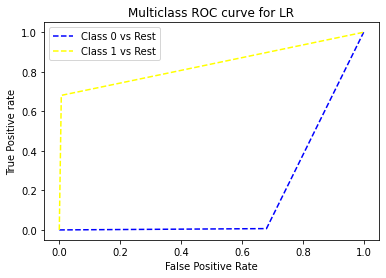

In [ ]:
roc(y_test, y_prediction)

##Random Forest without resampling and pca

In [ ]:
grid_result = RF(x_train_pca, y_train)

In [ ]:
results(grid_result)

Best: 0.894722 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.833959 (0.004717) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.831470 (0.006892) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.832692 (0.003337) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.831424 (0.005912) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.827057 (0.004930) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.830954 (0.004111) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.827855 (0.005675) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.828888 (0.002773) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.827949 (0.005688) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.852648 (0.008024) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.858095 (0.005952) with: {'max_depth':

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", RFresult['RF2'])

Analysis of the Algorithm:

[[4110  121]
 [ 997   96]]
[[4110  121]
 [ 997   96]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4231
           1       0.44      0.09      0.15      1093

    accuracy                           0.79      5324
   macro avg       0.62      0.53      0.51      5324
weighted avg       0.73      0.79      0.73      5324

Accuracy: 0.790007513148009
Precision: 0.7303820165725746
Recall: 0.790007513148009
F1 Score: 0.7296460072770516
Class 1 recall score on test data: 0.0878316559926807


In [ ]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5944741532976827


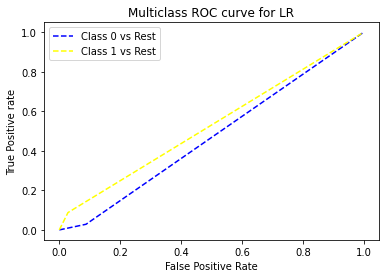

In [ ]:
roc(y_test, y_prediction)

##Random Forest with undersampling

In [ ]:
grid_result = RF(x_train_dres, y_train_dres)

In [ ]:
results(grid_result)

Best: 0.908557 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}
0.842912 (0.024268) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.859515 (0.014386) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.864368 (0.005169) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.865815 (0.014809) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.868029 (0.007294) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.864198 (0.004718) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.838399 (0.020540) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.858834 (0.011210) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.870072 (0.001968) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.878842 (0.007445) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.881652 (0.005087) with: {'max_depth'

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',RFresult['RF3'])

Analysis of the Algorithm:

[[3369  862]
 [ 205  888]]
[[3369  862]
 [ 205  888]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4231
           1       0.51      0.81      0.62      1093

    accuracy                           0.80      5324
   macro avg       0.73      0.80      0.74      5324
weighted avg       0.85      0.80      0.81      5324

Accuracy: 0.7995867768595041
Precision: 0.853293531467261
Recall: 0.7995867768595041
F1 Score: 0.8143088421474238
testing recall Score: 0.8124428179322964


In [ ]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.8282085561497327


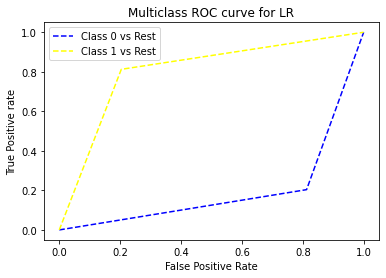

In [ ]:
roc(y_test, y_prediction)

##Random Forest with undersampling and pca

In [ ]:
grid_result = RF(x_train_downsampled_pca, y_train_dres)

In [ ]:
results(grid_result)

Best: 0.897829 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.832610 (0.017264) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.842827 (0.003802) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.839676 (0.004660) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.831843 (0.006039) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.839166 (0.005083) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.839336 (0.006048) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.831673 (0.011008) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.840868 (0.008490) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.837463 (0.006575) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.848106 (0.008012) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.851937 (0.005251) with: {'max_depth':

In [ ]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',RFresult['RF4'])

Analysis of the Algorithm:

[[3180 1051]
 [ 209  884]]
[[3180 1051]
 [ 209  884]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      4231
           1       0.46      0.81      0.58      1093

    accuracy                           0.76      5324
   macro avg       0.70      0.78      0.71      5324
weighted avg       0.84      0.76      0.78      5324

Accuracy: 0.763335837716003
Precision: 0.8394831207735242
Recall: 0.763335837716003
F1 Score: 0.7831650577247323
testing class 1 recall Score: 0.8087831655992681


In [ ]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.8444741532976827


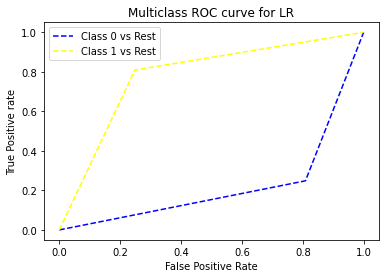

In [ ]:
roc(y_test, y_prediction)

##Random Forest with upsampling

In [ ]:
grid_result = RF(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [ ]:
results(grid_result)

Best: 0.846948 using {'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 100}
0.810537 (0.010238) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.811251 (0.006976) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.809109 (0.005871) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.803338 (0.007495) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.811370 (0.008719) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.811251 (0.007955) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.808127 (0.006699) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.809912 (0.005796) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.811667 (0.008124) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.813423 (0.008791) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.817736 (0.005876) with: {'max_depth

In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF5'])

Analysis of the Algorithm:

[[3968  263]
 [ 285  808]]
[[3968  263]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4231
           1       0.75      0.74      0.75      1093

    accuracy                           0.90      5324
   macro avg       0.84      0.84      0.84      5324
weighted avg       0.90      0.90      0.90      5324

Accuracy: 0.8970698722764838
Precision: 0.8963320484279524
Recall: 0.8970698722764838
F1 Score: 0.8966801148860726
Class 1 recall score for test data: 0.7392497712717292


In [ ]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7608876725368872


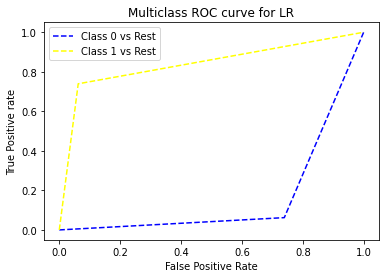

In [ ]:
roc(y_test, y_prediction)

##Random Forest with upsampling and pca

In [ ]:
grid_result = RF(X_train_upsampled_pca, y_train_ures_SMOTE)

In [ ]:
results(grid_result)

Best: 0.830438 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.771151 (0.009769) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.776803 (0.005612) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.782217 (0.007593) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.778439 (0.008298) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.779064 (0.004310) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.779540 (0.008314) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.776208 (0.006033) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.779540 (0.005171) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.779064 (0.005840) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.787393 (0.012334) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.794175 (0.002771) with: {'max_depth'

In [ ]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF6'])

Analysis of the Algorithm:

[[3731  500]
 [ 293  800]]
[[3731  500]
 [ 293  800]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4231
           1       0.62      0.73      0.67      1093

    accuracy                           0.85      5324
   macro avg       0.77      0.81      0.79      5324
weighted avg       0.86      0.85      0.86      5324

Accuracy: 0.8510518407212622
Precision: 0.8631748813884306
Recall: 0.8510518407212622
F1 Score: 0.8556265292296702
Class 1 recall score for test data: 0.7319304666056725


In [ ]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7804616849119467


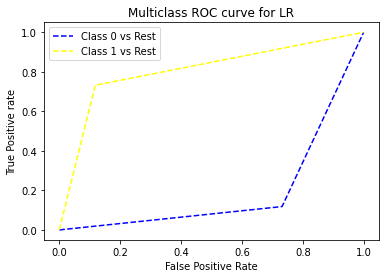

In [ ]:
roc(y_test, y_prediction)

##Random Forest without resampling

In [ ]:
grid_result = RF(featureSelectedTrain, y_train)

In [ ]:
results(grid_result)

Best: 0.925479 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.857720 (0.021132) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.888148 (0.005443) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.892891 (0.007097) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.873733 (0.014311) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.884438 (0.010332) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.880916 (0.013830) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.871900 (0.020791) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.888430 (0.010612) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.880541 (0.012373) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.896694 (0.007405) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.902846 (0.009322) with: {'max_depth':

In [ ]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
RFresult['RF7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF7'])

Analysis of the Algorithm:

[[4211   20]
 [ 351  742]]
[[4211   20]
 [ 351  742]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4231
           1       0.97      0.68      0.80      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.84      0.88      5324
weighted avg       0.93      0.93      0.93      5324

Accuracy: 0.9303155522163786
Precision: 0.9334672155601718
Recall: 0.9303155522163786
F1 Score: 0.9254100082855676
testing recall Score for class1: 0.6788655077767612


In [ ]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6726827094474154


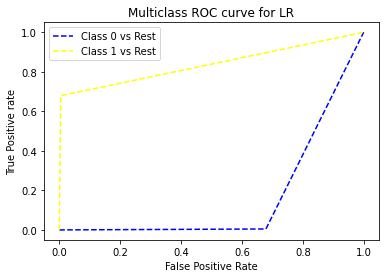

In [ ]:
roc(y_test, y_prediction)

##Random Forest Comparision

In [ ]:
RFresult

{'RF1': 0.6806953339432754,
 'RF2': 0.0878316559926807,
 'RF3': 0.8124428179322964,
 'RF4': 0.8087831655992681,
 'RF5': 0.7392497712717292,
 'RF6': 0.7319304666056725,
 'RF7': 0.6788655077767612}

In [ ]:
resultDic['Random Forest'] = 0.8124428179322964 #'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50

# CNN


In [ ]:
from tensorflow import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.metrics import AUC
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
def FCNN(X_train, y_train, X_test):
    batch_size = 256
    epochs = 30
    np.random.seed(5)        

    model = Sequential()

    model.add(Dense(input_shape= (X_train.shape[1],), units = 150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 75, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.build()
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
    model.summary()

    early_stops = EarlyStopping(patience=10, monitor='val_acc')
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit(X_train, y_train, callbacks=[early_stops, mc], batch_size= batch_size, epochs= epochs, verbose=1)

    pred = model.predict(X_test)
  
    return pred

In [ ]:
def print_analysis(y_test, results):
  print('ROC_AUC of the test set:', roc_auc_score(y_test, results))
  results_class = (np.array(results) > 0.8).astype(int)
  cm = confusion_matrix(y_test, results_class)
  print('\nConfusion_metrix : \n', cm)
  tn = cm[0][0]
  fp = cm[0][1]    
  fn = cm[1][0]
  tp = cm[1][1]
  precision = tp / (tp + fp)
  print( 'Precision : ', precision )
  recall = tp / (tp + fn)
  print( 'Recall : ', recall )
  print( 'F1-score :', 2*precision*recall/(precision+recall))

CNN without resampling

In [ ]:
results1 = FCNN(x_train, y_train, x_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               4650      
                                                                 
 batch_normalization_3 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_4 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 75)               

84/84 [==============================] - 2s 9ms/step - loss: 0.5470 - accuracy: 0.7738
Epoch 2/30
82/84 [============================>.] - ETA: 0s - loss: 0.3679 - accuracy: 0.8811

84/84 [==============================] - 1s 9ms/step - loss: 0.3667 - accuracy: 0.8817
Epoch 3/30
84/84 [==============================] - ETA: 0s - loss: 0.2963 - accuracy: 0.8994

84/84 [==============================] - 1s 9ms/step - loss: 0.2963 - accuracy: 0.8994
Epoch 4/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2805 - accuracy: 0.9038

84/84 [==============================] - 1s 8ms/step - loss: 0.2800 - accuracy: 0.9038
Epoch 5/30
84/84 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.9068

84/84 [==============================] - 1s 9ms/step - loss: 0.2652 - accuracy: 0.9068
Epoch 6/30
82/84 [============================>.] - ETA: 0s - loss: 0.2632 - accuracy: 0.9088

84/84 [==============================] - 1s 8ms/step - loss: 0.2631 - accuracy: 0.9087
Epoch 7/30
82/84 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.9076

84/84 [==============================] - 1s 7ms/step - loss: 0.2593 - accuracy: 0.9076
Epoch 8/30
82/84 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.9094

84/84 [==============================] - 1s 7ms/step - loss: 0.2576 - accuracy: 0.9095
Epoch 9/30
84/84 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.9116

84/84 [==============================] - 1s 7ms/step - loss: 0.2529 - accuracy: 0.9116
Epoch 10/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2511 - accuracy: 0.9122

84/84 [==============================] - 1s 8ms/step - loss: 0.2504 - accuracy: 0.9122
Epoch 11/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2504 - accuracy: 0.9118

84/84 [==============================] - 1s 8ms/step - loss: 0.2505 - accuracy: 0.9119
Epoch 12/30
83/84 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.9140

84/84 [==============================] - 1s 7ms/step - loss: 0.2440 - accuracy: 0.9141
Epoch 13/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2439 - accuracy: 0.9155

84/84 [==============================] - 1s 8ms/step - loss: 0.2440 - accuracy: 0.9152
Epoch 14/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.9156

84/84 [==============================] - 1s 8ms/step - loss: 0.2396 - accuracy: 0.9158
Epoch 15/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2389 - accuracy: 0.9160

84/84 [==============================] - 1s 9ms/step - loss: 0.2394 - accuracy: 0.9159
Epoch 16/30
82/84 [============================>.] - ETA: 0s - loss: 0.2355 - accuracy: 0.9175

84/84 [==============================] - 1s 8ms/step - loss: 0.2358 - accuracy: 0.9173
Epoch 17/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2406 - accuracy: 0.9151

84/84 [==============================] - 1s 8ms/step - loss: 0.2398 - accuracy: 0.9155
Epoch 18/30
83/84 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9163

84/84 [==============================] - 1s 8ms/step - loss: 0.2382 - accuracy: 0.9163
Epoch 19/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2353 - accuracy: 0.9182

84/84 [==============================] - 1s 9ms/step - loss: 0.2350 - accuracy: 0.9183
Epoch 20/30
82/84 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9185

84/84 [==============================] - 1s 9ms/step - loss: 0.2356 - accuracy: 0.9184
Epoch 21/30
84/84 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9175

84/84 [==============================] - 1s 9ms/step - loss: 0.2366 - accuracy: 0.9175
Epoch 22/30
82/84 [============================>.] - ETA: 0s - loss: 0.2353 - accuracy: 0.9187

84/84 [==============================] - 1s 9ms/step - loss: 0.2347 - accuracy: 0.9191
Epoch 23/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2305 - accuracy: 0.9194

84/84 [==============================] - 1s 9ms/step - loss: 0.2312 - accuracy: 0.9192
Epoch 24/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2306 - accuracy: 0.9198

84/84 [==============================] - 1s 8ms/step - loss: 0.2323 - accuracy: 0.9190
Epoch 25/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2297 - accuracy: 0.9196

84/84 [==============================] - 1s 8ms/step - loss: 0.2305 - accuracy: 0.9194
Epoch 26/30
82/84 [============================>.] - ETA: 0s - loss: 0.2292 - accuracy: 0.9194

84/84 [==============================] - 1s 8ms/step - loss: 0.2304 - accuracy: 0.9190
Epoch 27/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2298 - accuracy: 0.9197

84/84 [==============================] - 1s 8ms/step - loss: 0.2298 - accuracy: 0.9199
Epoch 28/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2259 - accuracy: 0.9220

84/84 [==============================] - 1s 7ms/step - loss: 0.2257 - accuracy: 0.9219
Epoch 29/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2279 - accuracy: 0.9208

84/84 [==============================] - 1s 7ms/step - loss: 0.2285 - accuracy: 0.9206
Epoch 30/30
82/84 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9216

167/167 [==============================] - 0s 2ms/step


In [ ]:
print_analysis(y_test, results1)

ROC_AUC of the test set: 0.9164031957734518

Confusion_metrix : 
 [[4228    3]
 [ 429  664]]
Precision :  0.9955022488755623
Recall :  0.6075022872827082
F1-score : 0.7545454545454544


CNN without resampling and pca

In [ ]:
results2 = FCNN(x_train_pca, y_train, x_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 150)               4650      
                                                                 
 batch_normalization_6 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_9 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_7 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 75)               

84/84 [==============================] - 2s 8ms/step - loss: 0.5441 - accuracy: 0.7713
Epoch 2/30
78/84 [==========================>...] - ETA: 0s - loss: 0.3662 - accuracy: 0.8809

84/84 [==============================] - 1s 8ms/step - loss: 0.3637 - accuracy: 0.8814
Epoch 3/30
82/84 [============================>.] - ETA: 0s - loss: 0.2997 - accuracy: 0.8978

84/84 [==============================] - 1s 7ms/step - loss: 0.2996 - accuracy: 0.8980
Epoch 4/30
83/84 [============================>.] - ETA: 0s - loss: 0.2804 - accuracy: 0.9008

84/84 [==============================] - 1s 7ms/step - loss: 0.2805 - accuracy: 0.9008
Epoch 5/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2724 - accuracy: 0.9036

84/84 [==============================] - 1s 7ms/step - loss: 0.2716 - accuracy: 0.9040
Epoch 6/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2670 - accuracy: 0.9050

84/84 [==============================] - 1s 8ms/step - loss: 0.2650 - accuracy: 0.9060
Epoch 7/30
82/84 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.9091

84/84 [==============================] - 1s 7ms/step - loss: 0.2582 - accuracy: 0.9089
Epoch 8/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2576 - accuracy: 0.9087

84/84 [==============================] - 1s 7ms/step - loss: 0.2577 - accuracy: 0.9083
Epoch 9/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2541 - accuracy: 0.9103

84/84 [==============================] - 1s 7ms/step - loss: 0.2547 - accuracy: 0.9099
Epoch 10/30
82/84 [============================>.] - ETA: 0s - loss: 0.2485 - accuracy: 0.9118

84/84 [==============================] - 1s 7ms/step - loss: 0.2490 - accuracy: 0.9114
Epoch 11/30
82/84 [============================>.] - ETA: 0s - loss: 0.2490 - accuracy: 0.9111

84/84 [==============================] - 1s 7ms/step - loss: 0.2487 - accuracy: 0.9113
Epoch 12/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2492 - accuracy: 0.9124

84/84 [==============================] - 1s 7ms/step - loss: 0.2489 - accuracy: 0.9128
Epoch 13/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2468 - accuracy: 0.9125

84/84 [==============================] - 1s 8ms/step - loss: 0.2464 - accuracy: 0.9130
Epoch 14/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2461 - accuracy: 0.9127

84/84 [==============================] - 1s 7ms/step - loss: 0.2447 - accuracy: 0.9135
Epoch 15/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2422 - accuracy: 0.9148

84/84 [==============================] - 1s 8ms/step - loss: 0.2431 - accuracy: 0.9146
Epoch 16/30
82/84 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9168

84/84 [==============================] - 1s 8ms/step - loss: 0.2392 - accuracy: 0.9164
Epoch 17/30
83/84 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9169

84/84 [==============================] - 1s 9ms/step - loss: 0.2367 - accuracy: 0.9169
Epoch 18/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2349 - accuracy: 0.9180

84/84 [==============================] - 1s 9ms/step - loss: 0.2348 - accuracy: 0.9179
Epoch 19/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2369 - accuracy: 0.9147

84/84 [==============================] - 1s 9ms/step - loss: 0.2353 - accuracy: 0.9155
Epoch 20/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2328 - accuracy: 0.9190

84/84 [==============================] - 1s 9ms/step - loss: 0.2332 - accuracy: 0.9188
Epoch 21/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2327 - accuracy: 0.9186

84/84 [==============================] - 1s 8ms/step - loss: 0.2330 - accuracy: 0.9185
Epoch 22/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2322 - accuracy: 0.9188

84/84 [==============================] - 1s 8ms/step - loss: 0.2325 - accuracy: 0.9187
Epoch 23/30
84/84 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9198

84/84 [==============================] - 1s 8ms/step - loss: 0.2292 - accuracy: 0.9198
Epoch 24/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2300 - accuracy: 0.9198

84/84 [==============================] - 1s 8ms/step - loss: 0.2288 - accuracy: 0.9202
Epoch 25/30
84/84 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9205

84/84 [==============================] - 1s 7ms/step - loss: 0.2274 - accuracy: 0.9205
Epoch 26/30
82/84 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9209

84/84 [==============================] - 1s 8ms/step - loss: 0.2293 - accuracy: 0.9210
Epoch 27/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2251 - accuracy: 0.9221

84/84 [==============================] - 1s 7ms/step - loss: 0.2264 - accuracy: 0.9214
Epoch 28/30
84/84 [==============================] - ETA: 0s - loss: 0.2248 - accuracy: 0.9212

84/84 [==============================] - 1s 8ms/step - loss: 0.2248 - accuracy: 0.9212
Epoch 29/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2238 - accuracy: 0.9218

84/84 [==============================] - 1s 7ms/step - loss: 0.2241 - accuracy: 0.9217
Epoch 30/30
83/84 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9214

167/167 [==============================] - 0s 2ms/step


In [ ]:
print_analysis(y_test, results2)

ROC_AUC of the test set: 0.6538522252109047

Confusion_metrix : 
 [[3465  766]
 [ 663  430]]
Precision :  0.3595317725752508
Recall :  0.3934126258005489
F1-score : 0.37570991699432066


CNN with undersampling

In [ ]:
results3 = FCNN(x_train_dres, y_train_dres, x_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               4650      
                                                                 
 batch_normalization_9 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 75)                11325     
                                                                 
 batch_normalization_10 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 75)               

58/58 [==============================] - 3s 8ms/step - loss: 0.5296 - accuracy: 0.8066
Epoch 2/30
56/58 [===========================>..] - ETA: 0s - loss: 0.3309 - accuracy: 0.8850

58/58 [==============================] - 0s 8ms/step - loss: 0.3301 - accuracy: 0.8850
Epoch 3/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2703 - accuracy: 0.8993

58/58 [==============================] - 0s 8ms/step - loss: 0.2694 - accuracy: 0.8997
Epoch 4/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2470 - accuracy: 0.9052

58/58 [==============================] - 0s 7ms/step - loss: 0.2471 - accuracy: 0.9045
Epoch 5/30
57/58 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9102

58/58 [==============================] - 0s 8ms/step - loss: 0.2363 - accuracy: 0.9101
Epoch 6/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2328 - accuracy: 0.9113

58/58 [==============================] - 0s 8ms/step - loss: 0.2322 - accuracy: 0.9114
Epoch 7/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2278 - accuracy: 0.9139

58/58 [==============================] - 0s 8ms/step - loss: 0.2276 - accuracy: 0.9139
Epoch 8/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2240 - accuracy: 0.9148

58/58 [==============================] - 0s 8ms/step - loss: 0.2233 - accuracy: 0.9152
Epoch 9/30
57/58 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9150

58/58 [==============================] - 1s 13ms/step - loss: 0.2207 - accuracy: 0.9150
Epoch 10/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2194 - accuracy: 0.9157

58/58 [==============================] - 1s 11ms/step - loss: 0.2187 - accuracy: 0.9163
Epoch 11/30
58/58 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.9168

58/58 [==============================] - 1s 14ms/step - loss: 0.2161 - accuracy: 0.9168
Epoch 12/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2126 - accuracy: 0.9182

58/58 [==============================] - 1s 11ms/step - loss: 0.2119 - accuracy: 0.9183
Epoch 13/30
58/58 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.9178

58/58 [==============================] - 1s 12ms/step - loss: 0.2110 - accuracy: 0.9178
Epoch 14/30
57/58 [============================>.] - ETA: 0s - loss: 0.2099 - accuracy: 0.9171

58/58 [==============================] - 1s 11ms/step - loss: 0.2097 - accuracy: 0.9173
Epoch 15/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2066 - accuracy: 0.9207

58/58 [==============================] - 1s 13ms/step - loss: 0.2068 - accuracy: 0.9207
Epoch 16/30
57/58 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9189

58/58 [==============================] - 1s 14ms/step - loss: 0.2078 - accuracy: 0.9192
Epoch 17/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2069 - accuracy: 0.9208

58/58 [==============================] - 1s 13ms/step - loss: 0.2059 - accuracy: 0.9211
Epoch 18/30
57/58 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9202

58/58 [==============================] - 1s 14ms/step - loss: 0.2047 - accuracy: 0.9200
Epoch 19/30
58/58 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9212

58/58 [==============================] - 1s 14ms/step - loss: 0.2049 - accuracy: 0.9212
Epoch 20/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1985 - accuracy: 0.9224

58/58 [==============================] - 1s 14ms/step - loss: 0.1988 - accuracy: 0.9225
Epoch 21/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2029 - accuracy: 0.9217

58/58 [==============================] - 1s 14ms/step - loss: 0.2034 - accuracy: 0.9216
Epoch 22/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1984 - accuracy: 0.9227

58/58 [==============================] - 1s 13ms/step - loss: 0.1991 - accuracy: 0.9226
Epoch 23/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1986 - accuracy: 0.9234

58/58 [==============================] - 1s 12ms/step - loss: 0.1987 - accuracy: 0.9234
Epoch 24/30
52/58 [=========================>....] - ETA: 0s - loss: 0.1953 - accuracy: 0.9232

58/58 [==============================] - 1s 13ms/step - loss: 0.1969 - accuracy: 0.9232
Epoch 25/30
57/58 [============================>.] - ETA: 0s - loss: 0.1940 - accuracy: 0.9240

58/58 [==============================] - 1s 9ms/step - loss: 0.1944 - accuracy: 0.9239
Epoch 26/30
57/58 [============================>.] - ETA: 0s - loss: 0.1951 - accuracy: 0.9237

58/58 [==============================] - 0s 8ms/step - loss: 0.1945 - accuracy: 0.9241
Epoch 27/30
58/58 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.9244

58/58 [==============================] - 0s 8ms/step - loss: 0.1925 - accuracy: 0.9244
Epoch 28/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1931 - accuracy: 0.9273

58/58 [==============================] - 0s 8ms/step - loss: 0.1929 - accuracy: 0.9275
Epoch 29/30
56/58 [===========================>..] - ETA: 0s - loss: 0.1928 - accuracy: 0.9243

58/58 [==============================] - 0s 8ms/step - loss: 0.1933 - accuracy: 0.9239
Epoch 30/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1926 - accuracy: 0.9243

167/167 [==============================] - 0s 1ms/step


In [ ]:
print_analysis(y_test, results3)

ROC_AUC of the test set: 0.9073635906975981

Confusion_metrix : 
 [[3972  259]
 [ 298  795]]
Precision :  0.75426944971537
Recall :  0.727355901189387
F1-score : 0.7405682347461574


CNN with downsampling and pca

In [ ]:
results4 = FCNN(x_train_downsampled_pca, y_train_dres, x_test_downsampled_transformed_pca)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2850      
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_1 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 75)                0

58/58 [==============================] - 3s 10ms/step - loss: 0.5300 - accuracy: 0.7993
Epoch 2/30
58/58 [==============================] - ETA: 0s - loss: 0.3320 - accuracy: 0.8843

58/58 [==============================] - 0s 8ms/step - loss: 0.3320 - accuracy: 0.8843
Epoch 3/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2695 - accuracy: 0.8989

58/58 [==============================] - 1s 9ms/step - loss: 0.2700 - accuracy: 0.8984
Epoch 4/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2506 - accuracy: 0.9059

58/58 [==============================] - 0s 9ms/step - loss: 0.2518 - accuracy: 0.9047
Epoch 5/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2417 - accuracy: 0.9065

58/58 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.9060
Epoch 6/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2377 - accuracy: 0.9076

58/58 [==============================] - 1s 9ms/step - loss: 0.2363 - accuracy: 0.9083
Epoch 7/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2299 - accuracy: 0.9119

58/58 [==============================] - 1s 10ms/step - loss: 0.2300 - accuracy: 0.9122
Epoch 8/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2273 - accuracy: 0.9113

58/58 [==============================] - 1s 9ms/step - loss: 0.2269 - accuracy: 0.9114
Epoch 9/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2222 - accuracy: 0.9135

58/58 [==============================] - 0s 8ms/step - loss: 0.2243 - accuracy: 0.9130
Epoch 10/30
57/58 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9134

58/58 [==============================] - 0s 8ms/step - loss: 0.2227 - accuracy: 0.9136
Epoch 11/30
57/58 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9156

58/58 [==============================] - 1s 9ms/step - loss: 0.2210 - accuracy: 0.9159
Epoch 12/30
58/58 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9174

58/58 [==============================] - 0s 8ms/step - loss: 0.2188 - accuracy: 0.9174
Epoch 13/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2169 - accuracy: 0.9138

58/58 [==============================] - 0s 7ms/step - loss: 0.2158 - accuracy: 0.9141
Epoch 14/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2145 - accuracy: 0.9169

58/58 [==============================] - 0s 7ms/step - loss: 0.2136 - accuracy: 0.9173
Epoch 15/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2120 - accuracy: 0.9170

58/58 [==============================] - 0s 7ms/step - loss: 0.2132 - accuracy: 0.9164
Epoch 16/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2122 - accuracy: 0.9171

58/58 [==============================] - 0s 8ms/step - loss: 0.2123 - accuracy: 0.9170
Epoch 17/30
58/58 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.9177

58/58 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 0.9177
Epoch 18/30
58/58 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9179

58/58 [==============================] - 0s 8ms/step - loss: 0.2120 - accuracy: 0.9179
Epoch 19/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2071 - accuracy: 0.9213

58/58 [==============================] - 1s 9ms/step - loss: 0.2063 - accuracy: 0.9214
Epoch 20/30
58/58 [==============================] - ETA: 0s - loss: 0.2044 - accuracy: 0.9190

58/58 [==============================] - 1s 9ms/step - loss: 0.2044 - accuracy: 0.9190
Epoch 21/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2020 - accuracy: 0.9194

58/58 [==============================] - 1s 10ms/step - loss: 0.2025 - accuracy: 0.9201
Epoch 22/30
58/58 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.9210

58/58 [==============================] - 1s 9ms/step - loss: 0.2032 - accuracy: 0.9210
Epoch 23/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2019 - accuracy: 0.9208

58/58 [==============================] - 0s 8ms/step - loss: 0.2014 - accuracy: 0.9214
Epoch 24/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2025 - accuracy: 0.9214

58/58 [==============================] - 0s 7ms/step - loss: 0.2020 - accuracy: 0.9212
Epoch 25/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2001 - accuracy: 0.9222

58/58 [==============================] - 0s 7ms/step - loss: 0.1996 - accuracy: 0.9222
Epoch 26/30
56/58 [===========================>..] - ETA: 0s - loss: 0.1998 - accuracy: 0.9226

58/58 [==============================] - 0s 8ms/step - loss: 0.1994 - accuracy: 0.9231
Epoch 27/30
51/58 [=========================>....] - ETA: 0s - loss: 0.1971 - accuracy: 0.9239

58/58 [==============================] - 0s 7ms/step - loss: 0.1982 - accuracy: 0.9231
Epoch 28/30
52/58 [=========================>....] - ETA: 0s - loss: 0.1964 - accuracy: 0.9236

58/58 [==============================] - 0s 8ms/step - loss: 0.1958 - accuracy: 0.9241
Epoch 29/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1947 - accuracy: 0.9243

58/58 [==============================] - 0s 8ms/step - loss: 0.1951 - accuracy: 0.9243
Epoch 30/30
53/58 [==========================>...] - ETA: 0s - loss: 0.1949 - accuracy: 0.9238

167/167 [==============================] - 0s 2ms/step


In [ ]:
print_analysis(y_test, results4)

ROC_AUC of the test set: 0.905893264176774

Confusion_metrix : 
 [[3944  287]
 [ 301  792]]
Precision :  0.7340129749768304
Recall :  0.7246111619396157
F1-score : 0.7292817679558011


CNN with upsampling

In [ ]:
results5 = FCNN(x_train_ures_SMOTE, y_train_ures_SMOTE, x_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 150)               4650      
                                                                 
 batch_normalization_12 (Bat  (None, 150)              600       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 150)               0         
                                                                 
 dense_17 (Dense)            (None, 75)                11325     
                                                                 
 batch_normalization_13 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 75)               

132/132 [==============================] - 4s 11ms/step - loss: 0.4705 - accuracy: 0.7956
Epoch 2/30
127/132 [===========================>..] - ETA: 0s - loss: 0.3676 - accuracy: 0.8303

132/132 [==============================] - 1s 8ms/step - loss: 0.3679 - accuracy: 0.8298
Epoch 3/30
129/132 [============================>.] - ETA: 0s - loss: 0.3512 - accuracy: 0.8367

132/132 [==============================] - 3s 21ms/step - loss: 0.3514 - accuracy: 0.8365
Epoch 4/30
128/132 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8393

132/132 [==============================] - 2s 13ms/step - loss: 0.3414 - accuracy: 0.8389
Epoch 5/30
129/132 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8394

132/132 [==============================] - 2s 13ms/step - loss: 0.3357 - accuracy: 0.8395
Epoch 6/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3298 - accuracy: 0.8413

132/132 [==============================] - 1s 9ms/step - loss: 0.3296 - accuracy: 0.8414
Epoch 7/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3285 - accuracy: 0.8435

132/132 [==============================] - 1s 7ms/step - loss: 0.3272 - accuracy: 0.8443
Epoch 8/30
130/132 [============================>.] - ETA: 0s - loss: 0.3222 - accuracy: 0.8466

132/132 [==============================] - 1s 7ms/step - loss: 0.3215 - accuracy: 0.8472
Epoch 9/30
129/132 [============================>.] - ETA: 0s - loss: 0.3196 - accuracy: 0.8484

132/132 [==============================] - 1s 7ms/step - loss: 0.3195 - accuracy: 0.8485
Epoch 10/30
127/132 [===========================>..] - ETA: 0s - loss: 0.3164 - accuracy: 0.8477

132/132 [==============================] - 1s 7ms/step - loss: 0.3161 - accuracy: 0.8481
Epoch 11/30
128/132 [============================>.] - ETA: 0s - loss: 0.3122 - accuracy: 0.8514

132/132 [==============================] - 1s 7ms/step - loss: 0.3122 - accuracy: 0.8514
Epoch 12/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3107 - accuracy: 0.8515

132/132 [==============================] - 1s 7ms/step - loss: 0.3104 - accuracy: 0.8515
Epoch 13/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3092 - accuracy: 0.8512

132/132 [==============================] - 1s 7ms/step - loss: 0.3089 - accuracy: 0.8515
Epoch 14/30
131/132 [============================>.] - ETA: 0s - loss: 0.3071 - accuracy: 0.8531

132/132 [==============================] - 1s 8ms/step - loss: 0.3069 - accuracy: 0.8531
Epoch 15/30
129/132 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8529

132/132 [==============================] - 1s 8ms/step - loss: 0.3036 - accuracy: 0.8532
Epoch 16/30
130/132 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8532

132/132 [==============================] - 1s 7ms/step - loss: 0.3041 - accuracy: 0.8531
Epoch 17/30
125/132 [===========================>..] - ETA: 0s - loss: 0.3040 - accuracy: 0.8522

132/132 [==============================] - 1s 7ms/step - loss: 0.3043 - accuracy: 0.8522
Epoch 18/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2997 - accuracy: 0.8555

132/132 [==============================] - 1s 7ms/step - loss: 0.2998 - accuracy: 0.8559
Epoch 19/30
125/132 [===========================>..] - ETA: 0s - loss: 0.2958 - accuracy: 0.8589

132/132 [==============================] - 1s 7ms/step - loss: 0.2967 - accuracy: 0.8581
Epoch 20/30
130/132 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.8579

132/132 [==============================] - 1s 8ms/step - loss: 0.2980 - accuracy: 0.8582
Epoch 21/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2943 - accuracy: 0.8586

132/132 [==============================] - 1s 8ms/step - loss: 0.2943 - accuracy: 0.8583
Epoch 22/30
129/132 [============================>.] - ETA: 0s - loss: 0.2934 - accuracy: 0.8575

132/132 [==============================] - 1s 7ms/step - loss: 0.2934 - accuracy: 0.8574
Epoch 23/30
128/132 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8577

132/132 [==============================] - 1s 7ms/step - loss: 0.2940 - accuracy: 0.8578
Epoch 24/30
128/132 [============================>.] - ETA: 0s - loss: 0.2927 - accuracy: 0.8591

132/132 [==============================] - 1s 8ms/step - loss: 0.2929 - accuracy: 0.8592
Epoch 25/30
128/132 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.8580

132/132 [==============================] - 1s 8ms/step - loss: 0.2913 - accuracy: 0.8580
Epoch 26/30
131/132 [============================>.] - ETA: 0s - loss: 0.2898 - accuracy: 0.8614

132/132 [==============================] - 1s 8ms/step - loss: 0.2898 - accuracy: 0.8615
Epoch 27/30
131/132 [============================>.] - ETA: 0s - loss: 0.2868 - accuracy: 0.8612

132/132 [==============================] - 1s 8ms/step - loss: 0.2867 - accuracy: 0.8612
Epoch 28/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2861 - accuracy: 0.8621

132/132 [==============================] - 1s 7ms/step - loss: 0.2861 - accuracy: 0.8617
Epoch 29/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2845 - accuracy: 0.8627

132/132 [==============================] - 1s 8ms/step - loss: 0.2852 - accuracy: 0.8623
Epoch 30/30
130/132 [============================>.] - ETA: 0s - loss: 0.2846 - accuracy: 0.8636

167/167 [==============================] - 0s 2ms/step


In [ ]:
print_analysis(y_test, results5)

ROC_AUC of the test set: 0.9079938233095461

Confusion_metrix : 
 [[4182   49]
 [ 362  731]]
Precision :  0.9371794871794872
Recall :  0.6688014638609332
F1-score : 0.7805659369994662


In [ ]:
resultDic['CNN'] = 0.9248

#Final Analysis

In [ ]:
resultDic

{'CNN': 0.9248,
 'Random Forest': 0.8124428179322964,
 'Decision Tree': 0.8536139066788655,
 'LogisticRegression': 0.8115279048490394}